In [1]:
import numpy as np
import matplotlib.pyplot as plt
import dedalus.public as de
import dedalus.dev as dev
import dedalus.extras.plot_tools as plot_tools
import atmospheres as atmos
from scipy import linalg
import tides
import modes
import parameters as param
import mpi4py.MPI as MPI
import uuid
import logging
import pickle
import pathlib
logger = logging.getLogger(__name__)
%matplotlib notebook

2018-05-25 00:00:22,777 matplotlib.backends 0/1 DEBUG :: backend nbAgg version unknown


In [4]:
import importlib
importlib.reload(param)
param.Nz = 256

## Solve 2D linear tide

In [5]:
param.A_tide = 1

domain, problem = tides.linear_tide_2d(param, dtype=np.complex128)
solver_bvp = problem.build_solver()
solver_bvp.solve()
solver_bvp.state.gather()
solver_bvp.state.data[0,:] = 0

domain, problem = tides.ivp(param, dtype=np.complex128)
solver = problem.build_solver(param.ts)
np.copyto(solver.state.data, solver_bvp.state.data)
solver.state.scatter()

2018-05-25 00:00:45,159 domain 0/1 DEBUG :: Global coeff shape: [256]
2018-05-25 00:00:45,160 distributor 0/1 DEBUG :: Mesh: []
2018-05-25 00:00:45,163 problems 0/1 DEBUG :: Parsing Eqn 0
2018-05-25 00:00:45,164 problems 0/1 DEBUG ::   Condition: True
2018-05-25 00:00:45,165 problems 0/1 DEBUG ::   LHS string form: dz(pz) + (N2/g)*pz
2018-05-25 00:00:45,166 problems 0/1 DEBUG ::   RHS string form: pz*pz/p/γ
2018-05-25 00:00:45,168 problems 0/1 DEBUG ::   LHS object form: dz(pz) + ((N2*(g**-1))*pz)
2018-05-25 00:00:45,169 problems 0/1 DEBUG ::   RHS object form: ((pz*pz)*(p**-1))*(γ**-1)
2018-05-25 00:00:45,173 problems 0/1 DEBUG ::   L linear form: dz(δpz) + ((N2*(g**-1))*δpz)
2018-05-25 00:00:45,175 problems 0/1 DEBUG ::   dF linear form: ((((pz*pz)*(-1*(p**-2)))*(γ**-1))*δp) + ((((pz*(p**-1))*(γ**-1))*δpz) + (((pz*(p**-1))*(γ**-1))*δpz))
2018-05-25 00:00:45,176 problems 0/1 DEBUG :: Parsing Eqn 1
2018-05-25 00:00:45,177 problems 0/1 DEBUG ::   Condition: True
2018-05-25 00:00:45,178 

2018-05-25 00:00:47,083 problems 0/1 DEBUG ::   RHS string form: 0
2018-05-25 00:00:47,085 problems 0/1 DEBUG ::   LHS object form: wz + (-1*dz(w))
2018-05-25 00:00:47,086 problems 0/1 DEBUG ::   RHS object form: 0
2018-05-25 00:00:47,088 problems 0/1 DEBUG ::   L linear form: wz + (-1*dz(w))
2018-05-25 00:00:47,089 problems 0/1 DEBUG :: Parsing BC 0
2018-05-25 00:00:47,089 problems 0/1 DEBUG ::   Condition: True
2018-05-25 00:00:47,090 problems 0/1 DEBUG ::   LHS string form: left(txz/μ)
2018-05-25 00:00:47,091 problems 0/1 DEBUG ::   RHS string form: 0
2018-05-25 00:00:47,092 problems 0/1 DEBUG ::   LHS object form: interp((μ*(dx(w) + uz))*(μ**-1),'z',left)
2018-05-25 00:00:47,093 problems 0/1 DEBUG ::   RHS object form: 0
2018-05-25 00:00:47,096 problems 0/1 DEBUG ::   L linear form: interp((μ*(μ**-1))*dx(w),'z',left) + interp((μ*(μ**-1))*uz,'z',left)
2018-05-25 00:00:47,097 problems 0/1 DEBUG :: Parsing BC 1
2018-05-25 00:00:47,098 problems 0/1 DEBUG ::   Condition: True
2018-05-25

/usr/local/lib/python3.6/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:192: MatrixRankWarning: Matrix is exactly singular
  warn("Matrix is exactly singular", MatrixRankWarning)


2018-05-25 00:01:00,551 domain 0/1 DEBUG :: Global coeff shape: [256]
2018-05-25 00:01:00,552 distributor 0/1 DEBUG :: Mesh: []
2018-05-25 00:01:00,555 problems 0/1 DEBUG :: Parsing Eqn 0
2018-05-25 00:01:00,556 problems 0/1 DEBUG ::   Condition: True
2018-05-25 00:01:00,556 problems 0/1 DEBUG ::   LHS string form: dz(pz) + (N2/g)*pz
2018-05-25 00:01:00,557 problems 0/1 DEBUG ::   RHS string form: pz*pz/p/γ
2018-05-25 00:01:00,560 problems 0/1 DEBUG ::   LHS object form: dz(pz) + ((N2*(g**-1))*pz)
2018-05-25 00:01:00,561 problems 0/1 DEBUG ::   RHS object form: ((pz*pz)*(p**-1))*(γ**-1)
2018-05-25 00:01:00,566 problems 0/1 DEBUG ::   L linear form: dz(δpz) + ((N2*(g**-1))*δpz)
2018-05-25 00:01:00,568 problems 0/1 DEBUG ::   dF linear form: ((((pz*pz)*(-1*(p**-2)))*(γ**-1))*δp) + ((((pz*(p**-1))*(γ**-1))*δpz) + (((pz*(p**-1))*(γ**-1))*δpz))
2018-05-25 00:01:00,570 problems 0/1 DEBUG :: Parsing Eqn 1
2018-05-25 00:01:00,571 problems 0/1 DEBUG ::   Condition: True
2018-05-25 00:01:00,572 

2018-05-25 00:01:02,472 problems 0/1 DEBUG ::   M linear form: p1
2018-05-25 00:01:02,473 problems 0/1 DEBUG ::   L linear form: ((U*dx(p1)) + (p0z*w)) + (((γ*p0)*dx(u)) + ((γ*p0)*wz))
2018-05-25 00:01:02,474 problems 0/1 DEBUG :: Parsing Eqn 4
2018-05-25 00:01:02,475 problems 0/1 DEBUG ::   Condition: True
2018-05-25 00:01:02,476 problems 0/1 DEBUG ::   LHS string form: uz - dz(u)
2018-05-25 00:01:02,476 problems 0/1 DEBUG ::   RHS string form: 0
2018-05-25 00:01:02,478 problems 0/1 DEBUG ::   LHS object form: uz + (-1*dz(u))
2018-05-25 00:01:02,478 problems 0/1 DEBUG ::   RHS object form: 0
2018-05-25 00:01:02,480 problems 0/1 DEBUG ::   M linear form: 0
2018-05-25 00:01:02,481 problems 0/1 DEBUG ::   L linear form: uz + (-1*dz(u))
2018-05-25 00:01:02,482 problems 0/1 DEBUG :: Parsing Eqn 5
2018-05-25 00:01:02,483 problems 0/1 DEBUG ::   Condition: True
2018-05-25 00:01:02,484 problems 0/1 DEBUG ::   LHS string form: wz - dz(w)
2018-05-25 00:01:02,484 problems 0/1 DEBUG ::   RHS stri

In [7]:
# Build systems
X0 = dev.system.FieldSystem(problem.variables, domain)
X1 = dev.system.FieldSystem(problem.variables, domain)
F = dev.system.FieldSystem(problem.variables, domain)
dF = dev.system.FieldSystem(problem.variables, domain)

# Unpack variables
a1, p1, u, w, uz, wz = X0.fields
# Gather operators
dx = domain.bases[0].Differentiate
dz = domain.bases[1].Differentiate
γ = param.γ
μ = param.μ
# Build substitutions
ux = dx(u)
wx = dx(w)
div_u = ux + wz
txx = μ*(2*ux - 2/3*div_u)
txz = μ*(wx + uz)
tzz = μ*(2*wz - 2/3*div_u)
# Build expressions
F1 = - (u*ux + w*uz) - a1*dx(p1) + a1*(dx(txx) + dz(txz))
F2 = - (u*wx + w*wz) - a1*dz(p1) + a1*(dx(txz) + dz(tzz))
F3 = - (u*dx(a1) + w*dz(a1)) +   a1*div_u
F4 = - (u*dx(p1) + w*dz(p1)) - γ*p1*div_u

# Build Frechet differentials
def frechet(F, X0, X1):
    dF = 0
    ep = dev.field.Scalar(name='__epsilon__')
    for x0, x1 in zip(X0.fields, X1.fields):
        dFi = F.replace(x0, x0 + ep*x1)
        dFi = dev.field.Operand.cast(dFi.sym_diff(ep))
        dFi = dFi.replace(ep, 0)
        dF += dFi
    return dF
dF1 = frechet(F1, X0, X1)
dF2 = frechet(F2, X0, X1)
dF3 = frechet(F3, X0, X1)
dF4 = frechet(F4, X0, X1)
# Build handlers
evaluator = dev.evaluator.Evaluator(domain, problem.namespace)
dFe_handler = evaluator.add_system_handler(iter=1, group='dF')
dFb_handler = evaluator.add_system_handler(iter=1, group='dF')
dFe_handler.add_task(dF1)
dFe_handler.add_task(dF2)
dFe_handler.add_task(dF3)
dFe_handler.add_task(dF4)
for i in range(2):
    dFe_handler.add_task(0*a1)
for i in range(4):
    dFb_handler.add_task(0*a1)
dFe = dFe_handler.build_system()
dFb = dFb_handler.build_system()

def compute_dF(iX0, iX1):
    # Copy to prebuilt systems
    iX0.gather()
    iX1.gather()
    np.copyto(X0.data, iX0.data)
    np.copyto(X1.data, iX1.data)
    X0.scatter()
    X1.scatter()
    # Evaluate and precondition dF
    evaluator.evaluate_group('dF')
    for p in solver.pencils:
        pFe = dFe.get_pencil(p)
        pFb = dFb.get_pencil(p)
        if p.G_bc is None:
            dF.set_pencil(p, p.G_eq*pFe)
        else:
            dF.set_pencil(p, p.G_eq*pFe + p.G_bc*pFb)
    dF.scatter()

In [8]:
force = False
savefile = "coupling_emodes_%i.pkl" %param.Nz

if (not force) and pathlib.Path(savefile).exists():
    # Load modes
    print('Loading modes')
    shortmodes = pickle.load(open(savefile, "rb"))
else:
    # Build modes
    print('Building modes')
    krel_list = np.arange(-5, 5+0.005, 0.5)
    eigenmodes = {}
    for krel in krel_list:
        eigenmodes[krel] = modes.compute_eigenmodes(param, krel*param.k_tide, sparse=False)
    # Save modes
    shortmodes = {key: val[:5] for key, val in eigenmodes.items()}
    pickle.dump(shortmodes, open(savefile, "wb"))

Loading modes


## Tide-wave self-coupling

In [105]:
def get_pencil(krel):
    wavenumbers = list(solver.domain.bases[0].wavenumbers)
    index = wavenumbers.index(krel*param.k_tide)
    return solver.pencils[index]

krel_list = np.arange(-5, 5+0.005, 0.5)

if param.Nz == 256:
#     damp_min = 1e-8
#     damp_max = 1e-3
#     freq_min_rel = 3e-3
#     freq_max = 2e2
    damp_min = 1e-8
    damp_max = 1e-4
    freq_min_rel = 5e-3
    freq_max = 1e2
elif param.Nz == 64:
    damp_min = 1e-8
    damp_max = 5e-5
    freq_grel_real_cut = 1e-2
    freq_p_real_cut = 5e1
elif param.Nz == 128:
    damp_min = 1e-8
    damp_max = 1e-4
    freq_grel_real_cut = 1e-2
    freq_p_real_cut = 1e2
else:
    raise

def gen_filt(freqs, krel):
    filt = (np.abs(freqs.real) < freq_max)
    filt *= (np.abs(freqs.imag) < damp_max) + (np.abs(freqs.real) > 1)
    filt *= (np.abs(freqs.imag) > damp_min)
    if krel != 0:
        filt *= (np.abs(freqs.real/krel) > freq_min_rel)
    return filt

<IPython.core.display.Javascript object>


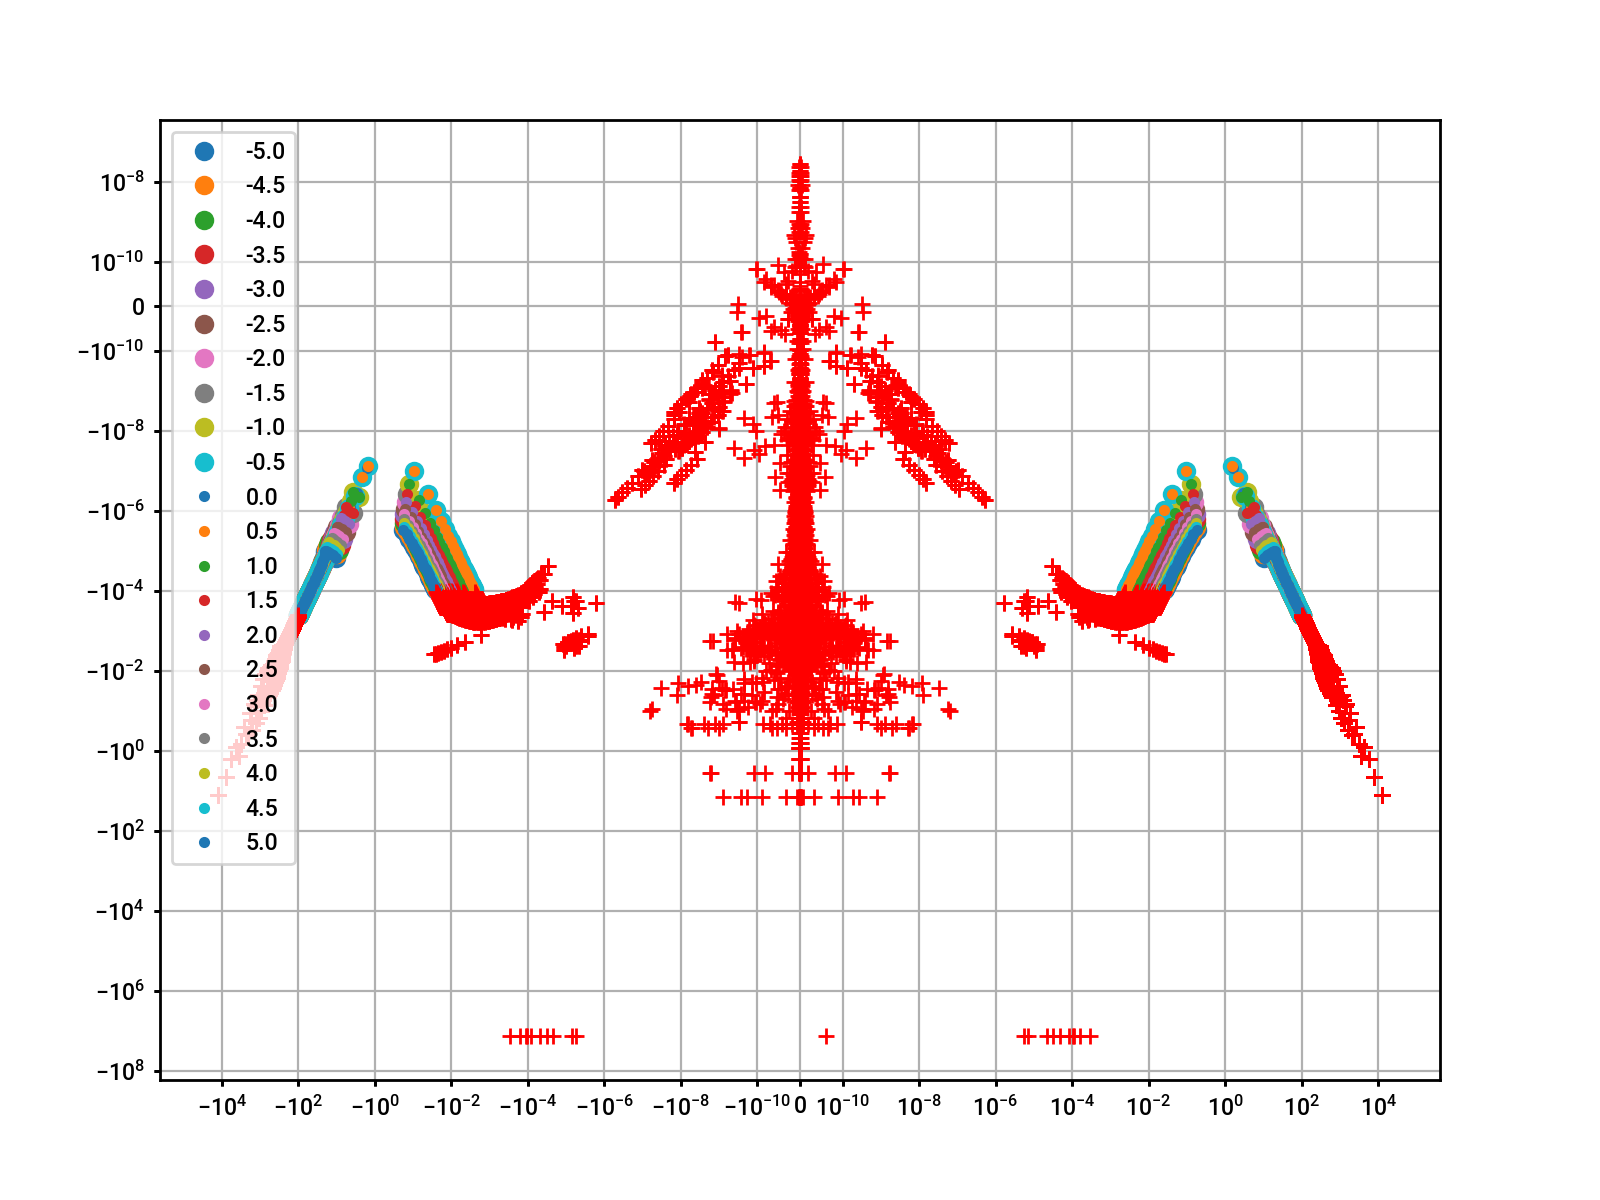

{-5.0: 186,
 -4.5: 186,
 -4.0: 186,
 -3.5: 190,
 -3.0: 190,
 -2.5: 190,
 -2.0: 190,
 -1.5: 190,
 -1.0: 192,
 -0.5: 192,
 0.0: 176,
 0.5: 192,
 1.0: 192,
 1.5: 190,
 2.0: 190,
 2.5: 190,
 3.0: 190,
 3.5: 190,
 4.0: 186,
 4.5: 186,
 5.0: 186}

In [106]:
N = {}
plt.figure()
for krel in krel_list:
    freqs = 1j * shortmodes[krel][0]
    filt = gen_filt(freqs, krel)
    N[krel] = np.sum(filt)
    if krel < 0:
        plt.plot(freqs[filt].real, freqs[filt].imag, 'o', label=str(krel))
        plt.plot(freqs[~filt].real, freqs[~filt].imag, '+r')
    else:
        plt.plot(freqs[filt].real, freqs[filt].imag, '.', label=str(krel))
        plt.plot(freqs[~filt].real, freqs[~filt].imag, '+r')
plt.xscale('symlog', linthreshx=1e-10)
plt.yscale('symlog', linthreshy=1e-10)
plt.grid()
plt.legend(loc='upper left')
N

In [107]:
state_wave = dev.system.FieldSystem(problem.variables, domain)

krel_list = np.arange(-5.0, 5.0+0.005, 0.5)

K_bLc_dict = {}
for krel_c in krel_list:
    print(krel_c)
    # Get c pencil data
    p_c = get_pencil(krel_c)
    evals_c, evecs_c, adj_evals_c, adj_evecs_c, proj_c = shortmodes[krel_c]
    filt_c = gen_filt(1j*evals_c, krel_c)
    N_c = np.sum(filt_c)
    # Compute coupling coefficients
    for j in range(N_c):
        # Set c state
        state_wave.data[:] = 0
        state_wave.set_pencil(p_c, evecs_c[:,filt_c][:,j])
        state_wave.scatter()
        # Compute dF
        compute_dF(solver.state, state_wave)
        for krel_b in krel_list:
            # Shortcut k selection rule
            if (krel_b != krel_c + 1) and (krel_b != krel_c - 1):
                continue
            # Get b pencil data
            p_b = get_pencil(krel_b)
            evals_b, evecs_b, adj_evals_b, adj_evecs_b, proj_b = shortmodes[krel_b]
            filt_b = gen_filt(1j*evals_b, krel_b)
            N_b = np.sum(filt_b)
            # Build coupling coefficient matrix
            if (krel_b, krel_c) not in K_bLc_dict:
                K_bLc = np.zeros((N_b, N_c), dtype=np.complex128)
                K_bLc_dict[(krel_b, krel_c)] = K_bLc
            else:
                K_bLc = K_bLc_dict[(krel_b, krel_c)]
            # Compute coupling coefficients
            #print(dF.get_pencil(p_b))
            K_bLc[:,j] = adj_evecs_b[:,filt_b].conj().T @ dF.get_pencil(p_b)

-5.0
-4.5
-4.0
-3.5
-3.0
-2.5
-2.0
-1.5
-1.0
-0.5
0.0
0.5
1.0
1.5
2.0
2.5
3.0
3.5
4.0
4.5
5.0


In [81]:
K_bLc_dict_copy = K_bLc_dict

In [86]:
np.max(np.abs(K_bLc_dict[(3,4)] - K_bLc_dict[(-3,-4)][::-1,::-1].conj()))

3.9080481270251204e-14

<IPython.core.display.Javascript object>


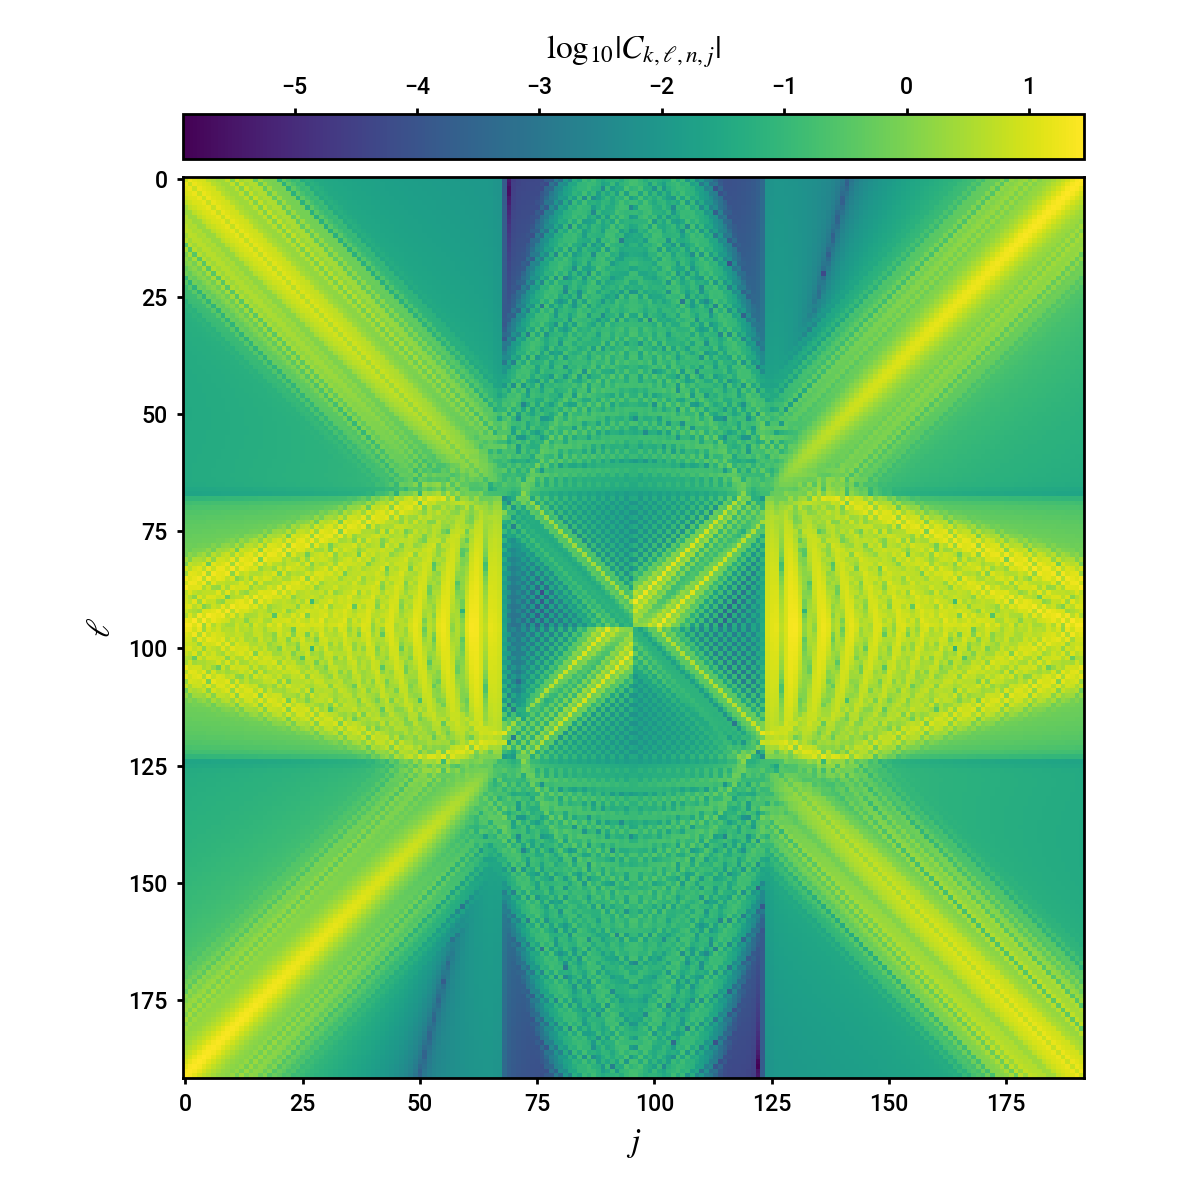

In [109]:
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
plt.style.use('thesis')

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
im = ax.imshow(np.log10(np.abs(K_bLc_dict[(0.5,-0.5)])), cmap='viridis', rasterized=True)

ax_divider = make_axes_locatable(ax)
cax = ax_divider.append_axes("top", size="5%", pad="2%")
plt.colorbar(im, cax=cax, orientation="horizontal")
cax.xaxis.set_ticks_position("top")

ax.set_ylabel(r'$\ell$')
ax.set_xlabel(r'$j$')
cax.set_title(r'$\log_{10} |C_{k,\ell,n,j}|$', pad=20)
fig.tight_layout()

In [110]:
plt.savefig('coupling_single.pdf')

2018-05-25 01:53:10,629 matplotlib.backends.backend_pdf 0/1 DEBUG :: Assigning font /b'F1' = '/Library/Fonts/Roboto-Medium.ttf'
2018-05-25 01:53:10,644 matplotlib.backends.backend_pdf 0/1 DEBUG :: Assigning font /b'F2' = '/usr/local/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneralItalic.ttf'
2018-05-25 01:53:10,697 matplotlib.backends.backend_pdf 0/1 DEBUG :: Assigning font /b'F3' = '/usr/local/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneral.ttf'
2018-05-25 01:53:10,699 matplotlib.backends.backend_pdf 0/1 DEBUG :: Embedding font /Library/Fonts/Roboto-Medium.ttf.
2018-05-25 01:53:10,700 matplotlib.backends.backend_pdf 0/1 DEBUG :: Writing TrueType font.
2018-05-25 01:53:10,707 matplotlib.backends.backend_pdf 0/1 DEBUG :: Embedding font /usr/local/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneral.ttf.
2018-05-25 01:53:10,708 matplotlib.backends.backend_pdf 0/1 DEBUG :: Writing TrueType font.
2018-05-25 01:53:10,716 matplotlib

In [111]:
def build_Q(A, krel_list):
    Q = []
    for kb in krel_list:
        Qb = []
        for kc in krel_list:
            if (kb == kc + 1) or (kb == kc - 1):
                Qbc = A * K_bLc_dict[(kb,kc)]
            else:
                Qbc = np.zeros((N[kb], N[kc]), dtype=np.complex128)
            if kb == kc:
                evals = shortmodes[kb][0]
                filt = gen_filt(1j*evals, kb)
                # Shift frequencies into comoving frame where tide is time-independent
                Qbb = np.diag(evals[filt] - (-1j*kb*param.ω_tide))
                Qbc += Qbb
            Qb.append(Qbc)
        Q.append(Qb)
    return np.block(Q)

<IPython.core.display.Javascript object>


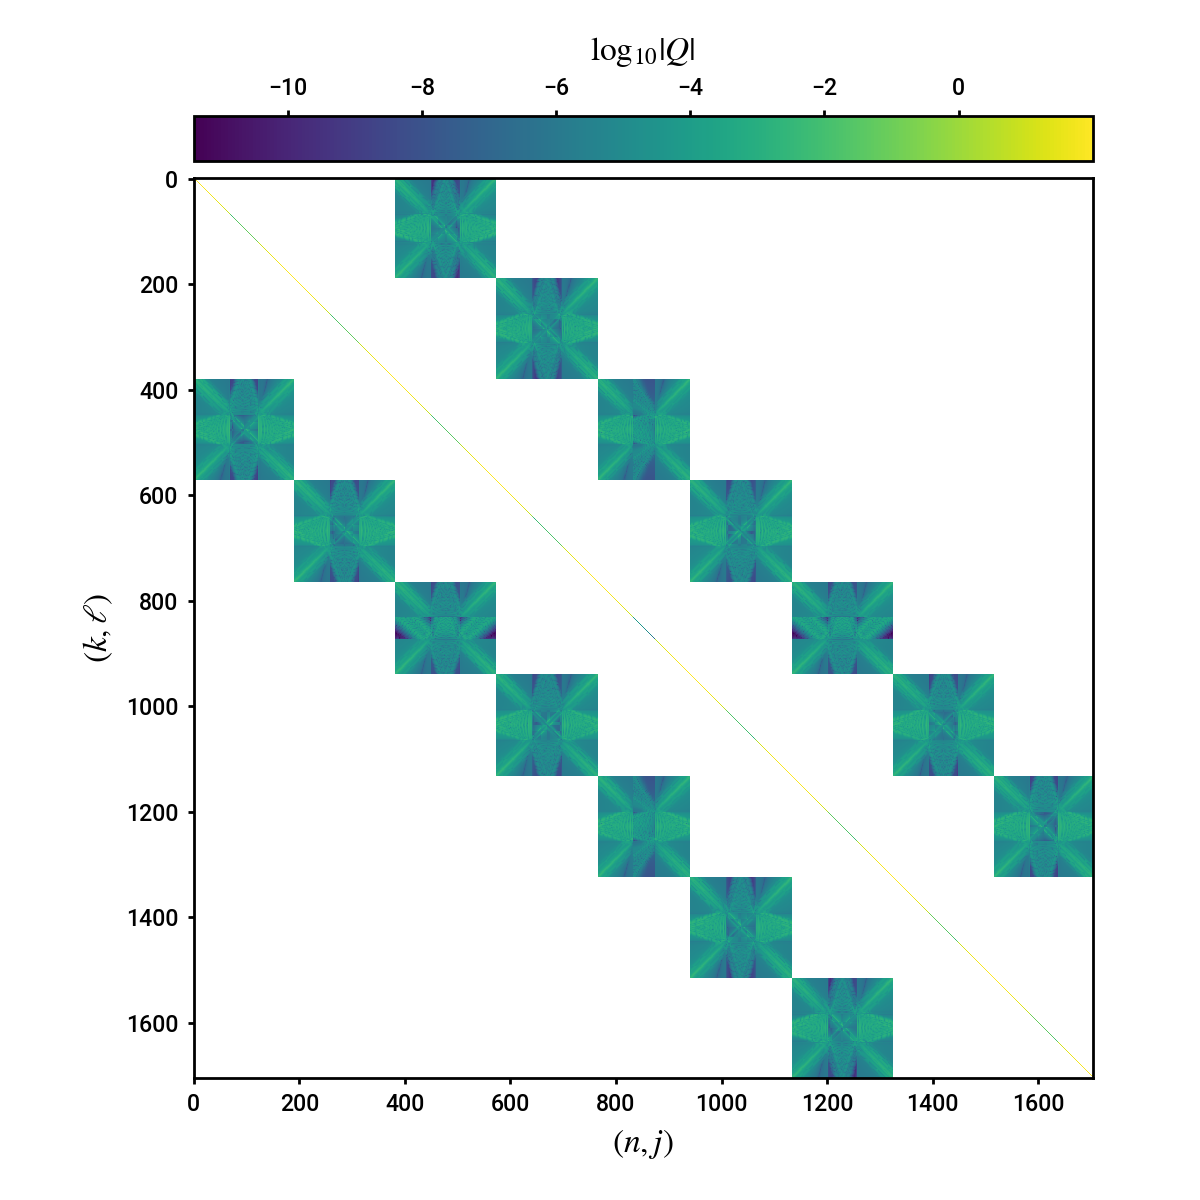

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log10
  # Remove the CWD from sys.path while we load stuff.


2018-05-25 02:12:11,160 matplotlib.backends.backend_pdf 0/1 DEBUG :: Assigning font /b'F1' = '/Library/Fonts/Roboto-Medium.ttf'
2018-05-25 02:12:11,173 matplotlib.backends.backend_pdf 0/1 DEBUG :: Assigning font /b'F2' = '/usr/local/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneral.ttf'
2018-05-25 02:12:11,173 matplotlib.backends.backend_pdf 0/1 DEBUG :: Assigning font /b'F3' = '/usr/local/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneralItalic.ttf'
2018-05-25 02:12:11,215 matplotlib.backends.backend_pdf 0/1 DEBUG :: Embedding font /Library/Fonts/Roboto-Medium.ttf.
2018-05-25 02:12:11,215 matplotlib.backends.backend_pdf 0/1 DEBUG :: Writing TrueType font.
2018-05-25 02:12:11,222 matplotlib.backends.backend_pdf 0/1 DEBUG :: Embedding font /usr/local/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneral.ttf.
2018-05-25 02:12:11,223 matplotlib.backends.backend_pdf 0/1 DEBUG :: Writing TrueType font.
2018-05-25 02:12:11,232 matplotlib

In [141]:
# Build eigenmode-time-evolution matrix Q
A = 1e-4
krel_list = np.arange(-2, 2+0.005, 0.5)
#krel_list = [-2,-1.5,-1,-0.5,0.5,1,1.5,2]
Q = build_Q(A, krel_list)

# Plot Q
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
im = ax.imshow(np.log10(np.abs(Q)), cmap='viridis')

ax_divider = make_axes_locatable(ax)
cax = ax_divider.append_axes("top", size="5%", pad="2%")
plt.colorbar(im, cax=cax, orientation="horizontal")
cax.xaxis.set_ticks_position("top")

ax.set_xlabel(r'$(n,j)$')
ax.set_ylabel(r'$(k,\ell)$')
cax.set_title(r'$\log_{10} |Q|$', pad=20)
fig.tight_layout()
plt.savefig('coupling_many.pdf')

In [142]:
# Find eigenmodes of Q
Q_evals, Q_evecs = linalg.eig(Q)
Q_freqs = 1j * Q_evals

In [124]:
Q_evals_sp, Q_evecs_sp = spla.eigs(sparse.csr_matrix(Q), k=1, sigma=1e-3)

In [125]:
np.max(Q_evals.real), np.max(Q_evals_sp.real)

(8.887346619244315e-06, 8.887346620971683e-06)

<IPython.core.display.Javascript object>


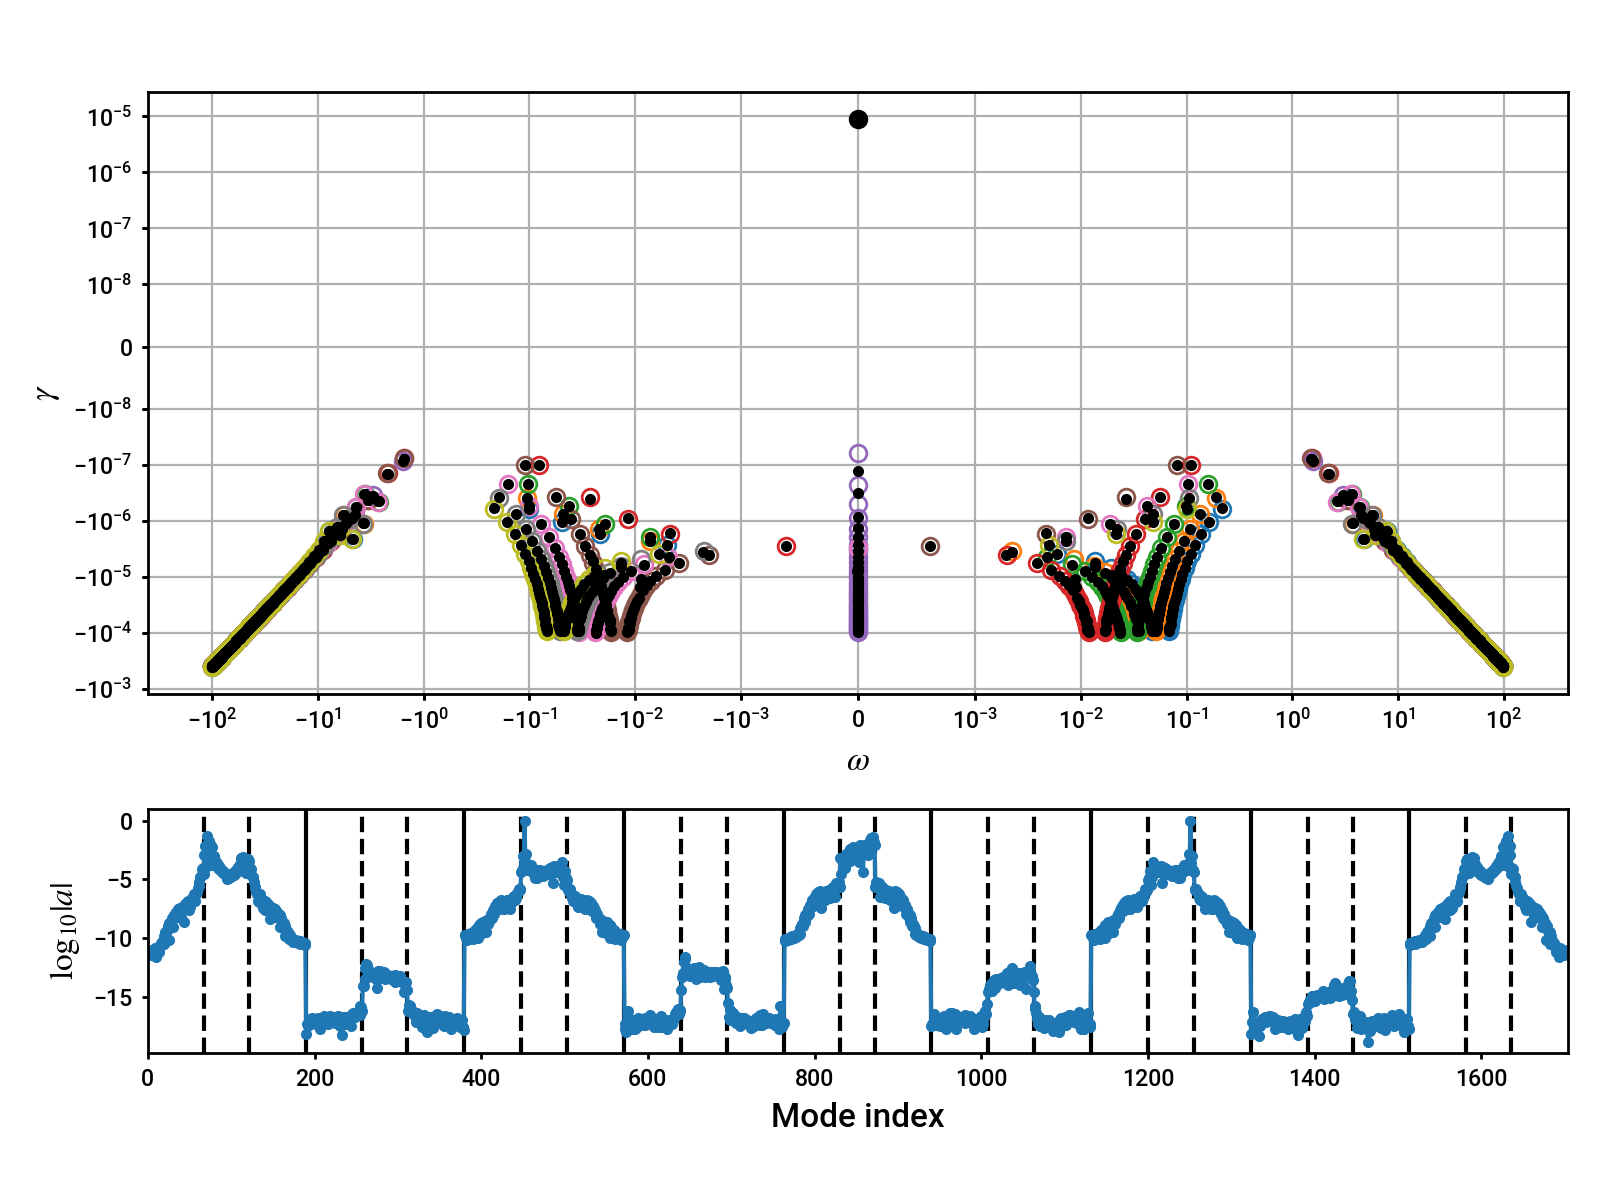

7

In [144]:
item = 1

# Plot eigenvalues of Q
fig = plt.figure(figsize=(8,6))
ax1 = plt.subplot2grid((3,1), (0,0), rowspan=2)
for krel in krel_list:
    freqs = 1j * shortmodes[krel][0]
    filt = gen_filt(freqs, krel)
    ax1.plot(freqs[filt].real-krel*param.ω_tide, freqs[filt].imag, 'o', mfc='none')
plt_Q, = ax1.plot(Q_freqs.real, Q_freqs.imag, '.k', picker=2)
ax1.set_xscale('symlog', linthreshx=1e-3)
ax1.set_yscale('symlog', linthreshy=1e-8)
ax1.set_xlabel(r'$\omega$')
ax1.set_ylabel(r'$\gamma$')
plt.grid()
active_dot, = ax1.plot(0, 0, 'ok')
active_ev = fig.suptitle('')

# Plot mode separations
ax2 = plt.subplot2grid((3,1), (2,0))
def plot_seps():
    n = 0
    for krel in krel_list:
        # Block separator
        if krel != krel_list[0]:
            ax2.axvline(item*n-0.5, c='k', zorder=-1)
        # P-G separator
        freqs = 1j * shortmodes[krel][0]
        filt = gen_filt(freqs, krel)
        ni = np.sum(freqs[filt].real < -1)
        ax2.axvline(item*n+item*ni-0.5, c='k', ls='dashed', zorder=-1)
        ni = np.sum(freqs[filt].real < 1)
        ax2.axvline(item*n+item*ni-0.5, c='k', ls='dashed', zorder=-1)
        n += N[krel]
    ax2.set_xlim(0, item*n)
    #ax2.set_ylim(-15,0)
    ax2.set_xlabel('Mode index')
    ax2.set_ylabel(r'$\log_{10} |a|$')

def plot_mode(event):
    # Update active eigenvalue
    Xm, Ym = event.mouseevent.x, event.mouseevent.y
    x = plt_Q.get_xdata()
    y = plt_Q.get_ydata()
    XY = ax1.transData.transform(np.array([x,y]).T)
    dXY = XY - np.array([Xm, Ym])
    D = np.sum(dXY**2, axis=1)
    index = np.argmin(D)
    freq = Q_freqs[index]
    active_dot.set_xdata([x[index]])
    active_dot.set_ydata([y[index]])
    #active_ev.set_text('%i: %s' %(index, freq))
    # Plot mode
    ax2.cla()
    evec = Q_evecs[:,index]
    evec = evec / np.max(np.abs(evec))
    ax2.plot(np.log10(np.abs(evec)), '.-')
    plot_seps()
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

fig.canvas.mpl_connect('pick_event', plot_mode)

In [145]:
plt.savefig('Q_spectrum.pdf')

2018-05-25 02:14:01,037 matplotlib.backends.backend_pdf 0/1 DEBUG :: Assigning font /b'F1' = '/Library/Fonts/Roboto-Medium.ttf'
2018-05-25 02:14:01,198 matplotlib.backends.backend_pdf 0/1 DEBUG :: Assigning font /b'F2' = '/usr/local/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneralItalic.ttf'
2018-05-25 02:14:01,646 matplotlib.backends.backend_pdf 0/1 DEBUG :: Assigning font /b'F3' = '/usr/local/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneral.ttf'
2018-05-25 02:14:01,718 matplotlib.backends.backend_pdf 0/1 DEBUG :: Embedding font /Library/Fonts/Roboto-Medium.ttf.
2018-05-25 02:14:01,719 matplotlib.backends.backend_pdf 0/1 DEBUG :: Writing TrueType font.
2018-05-25 02:14:01,727 matplotlib.backends.backend_pdf 0/1 DEBUG :: Embedding font /usr/local/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneral.ttf.
2018-05-25 02:14:01,728 matplotlib.backends.backend_pdf 0/1 DEBUG :: Writing TrueType font.
2018-05-25 02:14:01,736 matplotlib

In [146]:
from scipy import sparse
from scipy.sparse import linalg as spla

# Threshold
krel_list = np.arange(-2, 2+0.05, 0.5)
A_list = 10**np.linspace(-6,-3,32)

smax_list = []
smax_sp_list = []
for A in A_list:
    print(A)
    Q = build_Q(A, krel_list)
    Q_evals, Q_evecs = linalg.eig(Q)
    smax = np.max(Q_evals.real)
    smax_list.append(smax)
    Q_evals, Q_evecs = spla.eigs(sparse.csr_matrix(Q), k=1, sigma=1e-3)
    smax = np.max(Q_evals.real)
    smax_sp_list.append(smax)
    print(' ', smax)

1e-06
  -6.20189771808298e-08
1.2496091412919867e-06
  -6.202897427469434e-08
1.5615230060004964e-06
  -6.204433652371062e-08
1.9512934226359624e-06
  -6.206771954947801e-08
2.4383540982688266e-06
  -6.21027580155302e-08
3.0469895709035113e-06
  -6.215388113710828e-08
3.807546021222368e-06
  -6.222497558883155e-08
4.757944314009414e-06
  -6.23147507138825e-08
5.945570708544394e-06
  -6.240329643021451e-08
7.42963950759495e-06
  -6.241577622323816e-08
9.284145445194745e-06
  -6.212637687109945e-08
1.1601553017399714e-05
  -6.089673005487198e-08
1.4497406703726315e-05
  -5.68827918379089e-08
1.8116091942004134e-05
  -4.403780914951673e-08
2.2638034095214464e-05
  2.4049301254863015e-09
2.8288694346259665e-05
  1.7304017560807947e-07
3.5349811050301094e-05
  5.92232409184993e-07
4.4173447031400645e-05
  1.3302077209527592e-06
5.519954321281573e-05
  2.473876954062551e-06
6.897785379387658e-05
  4.168460953984324e-06
8.619535664753033e-05
  6.64208313748047e-06
0.00010771050560367691
  1.0

<IPython.core.display.Javascript object>


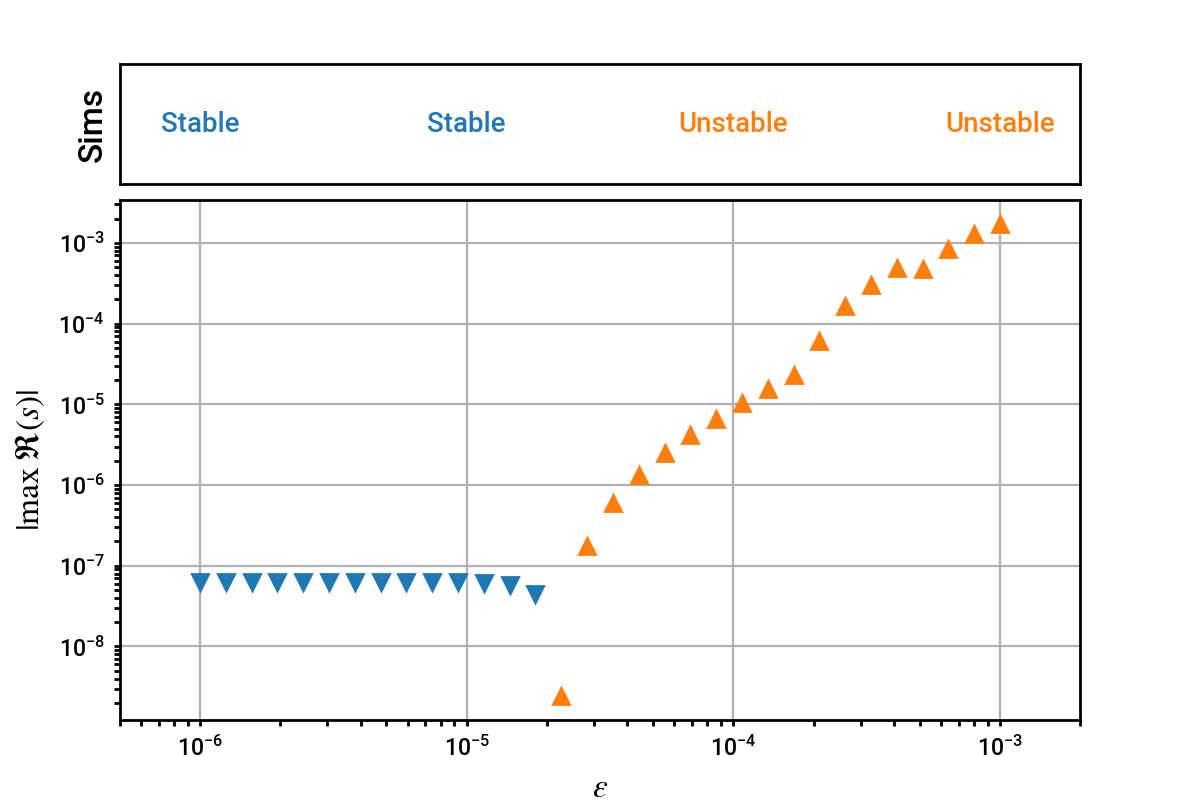

/usr/local/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


In [221]:
A = np.array(A_list)
smax = np.array(smax_list)
smax_sp = np.array(smax_sp_list)

fig = plt.figure(figsize=(6,4))
ax1 = fig.add_axes([0.1,0.77,0.8,0.15])
ax1.text(1e-6, 0, "Stable", ha='center', va='center', color='C0')
ax1.text(1e-5, 0, "Stable", ha='center', va='center', color='C0')
ax1.text(1e-4, 0, "Unstable", ha='center', va='center', color='C1')
ax1.text(1e-3, 0, "Unstable", ha='center', va='center', color='C1')
ax1.set_xscale('log')
ax1.set_xlim(10**-6.3, 10**-2.7)
ax1.set_ylim(-1, 1)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.minorticks_off()
ax1.set_ylabel("Sims")

ax2 = fig.add_axes([0.1,0.1,0.8,0.65])
ax2.plot(A[smax < 0], -smax[smax < 0], 'v')
ax2.plot(A[smax > 0], smax[smax > 0], '^')
ax2.set_xscale('log')
ax2.set_xlim(10**-6.3, 10**-2.7)
ax2.set_yscale('log')
ax2.grid()
ax2.set_xlabel(r'$\epsilon$')
ax2.set_ylabel(r'$|\max \; \Re(s)|$')

plt.tight_layout()

In [222]:
plt.savefig('coupled_growth.pdf')

2018-05-25 02:58:23,354 matplotlib.backends.backend_pdf 0/1 DEBUG :: Assigning font /b'F1' = '/Library/Fonts/Roboto-Medium.ttf'
2018-05-25 02:58:23,439 matplotlib.backends.backend_pdf 0/1 DEBUG :: Assigning font /b'F2' = '/usr/local/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneralItalic.ttf'
2018-05-25 02:58:23,518 matplotlib.backends.backend_pdf 0/1 DEBUG :: Assigning font /b'F3' = '/usr/local/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneral.ttf'
2018-05-25 02:58:23,523 matplotlib.backends.backend_pdf 0/1 DEBUG :: Embedding font /Library/Fonts/Roboto-Medium.ttf.
2018-05-25 02:58:23,524 matplotlib.backends.backend_pdf 0/1 DEBUG :: Writing TrueType font.
2018-05-25 02:58:23,533 matplotlib.backends.backend_pdf 0/1 DEBUG :: Embedding font /usr/local/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneral.ttf.
2018-05-25 02:58:23,534 matplotlib.backends.backend_pdf 0/1 DEBUG :: Writing TrueType font.
2018-05-25 02:58:23,542 matplotlib

In [57]:
smax_list

[-6.201897730139741e-08,
 -6.208160169813258e-08,
 -6.230419334541564e-08,
 -6.187423937453786e-08,
 -1.3923920345659548e-08,
 1.5452516828430207e-06,
 8.887346532633077e-06,
 8.060005012276874e-05,
 0.0005101574291328943,
 0.0017330888721325262]

## Self-coupling

In [109]:
krel = 0.5
ω = 6.43e-4

# Find index of positive mode
evals = shortmodes[krel][0]
freqs = 1j * evals
filt = gen_filt(1j*evals, krel)
filt_index_f = np.argmin(np.abs(freqs[filt].real - krel*param.ω_tide - ω))
freq_f = freqs[filt][filt_index_f]
print(freq_f)

# Find index of negative mode
evals = shortmodes[-krel][0]
freqs = 1j * evals
filt = gen_filt(1j*evals, -krel)
filt_index_b = np.argmin(np.abs(-freqs[filt].real - krel*param.ω_tide - ω))
freq_b = freqs[filt][filt_index_b]
print(freq_b)

# Build Q
def build_Q_self(A):
    Q = np.zeros((2,2), dtype=np.complex128)
    Q[0,0] = -1j * (freq_f - krel*param.ω_tide)
    Q[1,1] = -1j * (freq_b + krel*param.ω_tide)
    Q[0,1] = A * K_bLc_dict[(krel, -krel)][filt_index_f, filt_index_b]
    Q[1,0] = A * K_bLc_dict[(-krel, krel)][filt_index_b, filt_index_f]
    return Q

(0.014989827808875382-2.8359509540108117e-06j)
(-0.014989827808875382-2.8359509540108117e-06j)


In [122]:
A_range = np.linspace(8e-3, 9e-3, 100000)
growth = []
for A in A_range:
    Q = build_Q_self(A)
    freq = 1j * np.linalg.eigvals(Q)
    growth.append(np.max(freq.imag))

<IPython.core.display.Javascript object>


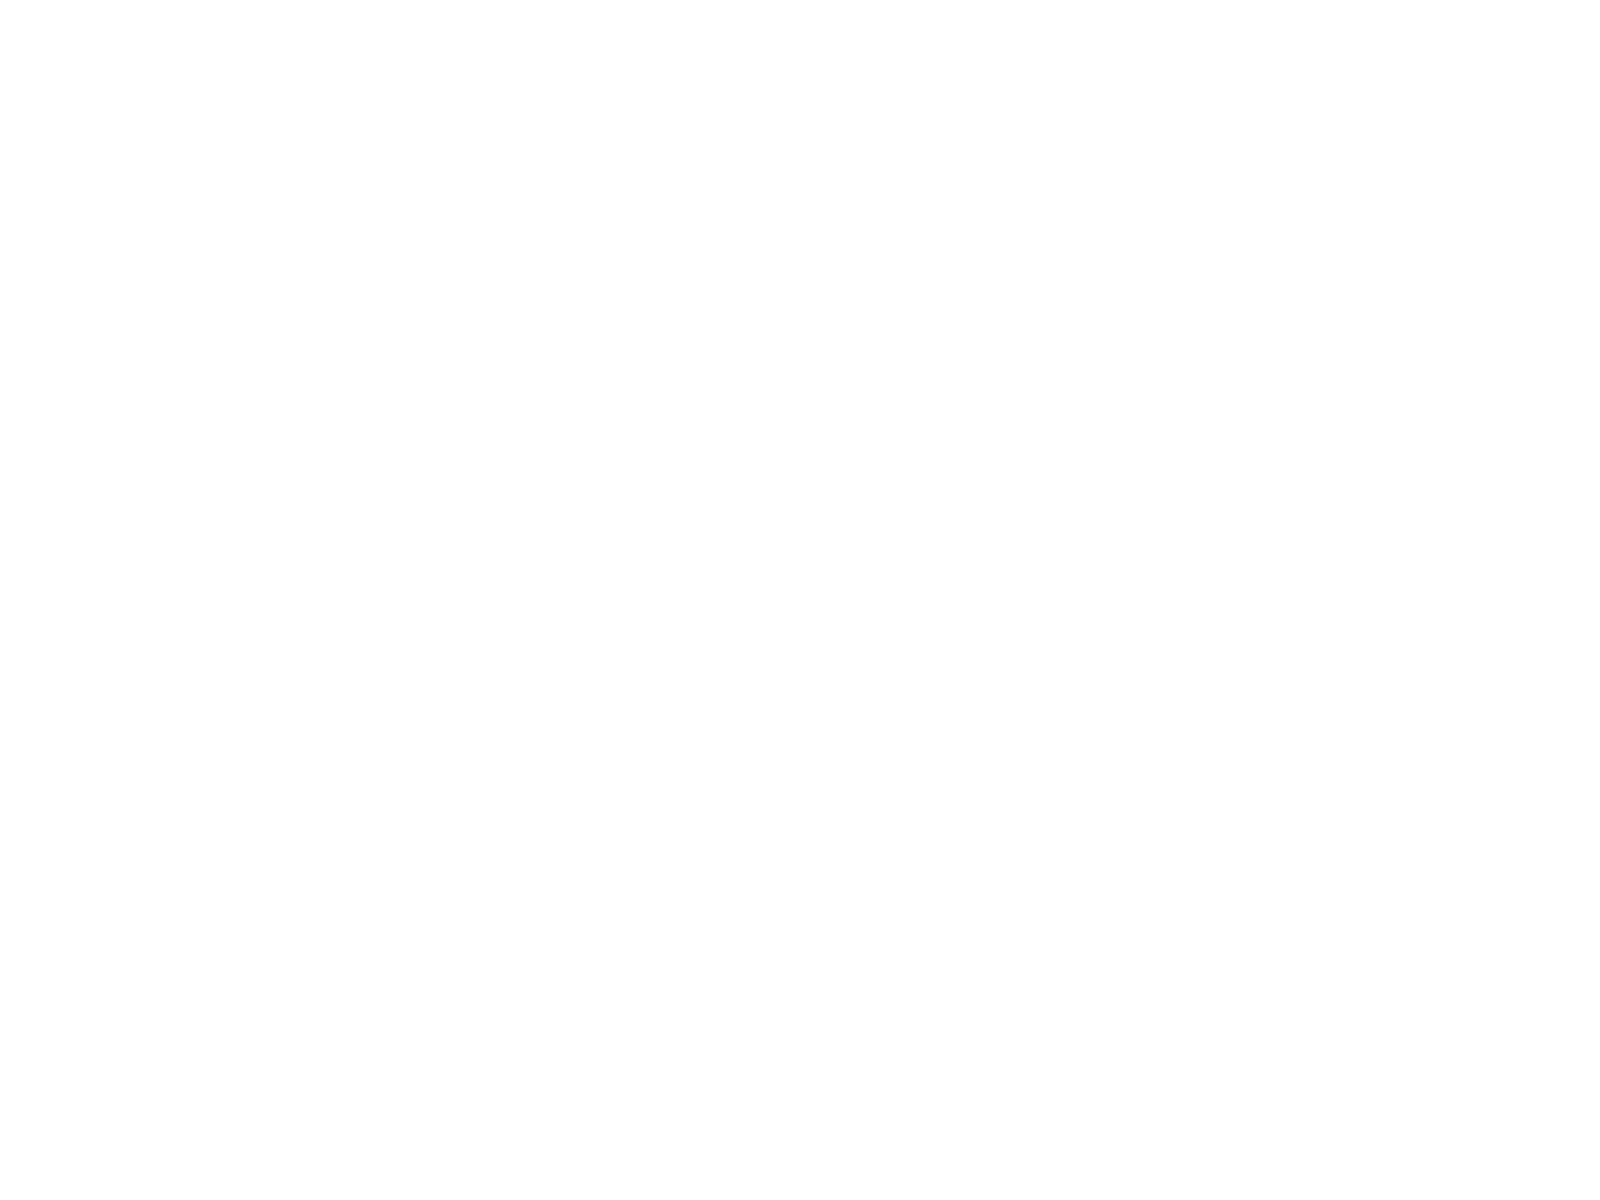

<IPython.core.display.Javascript object>


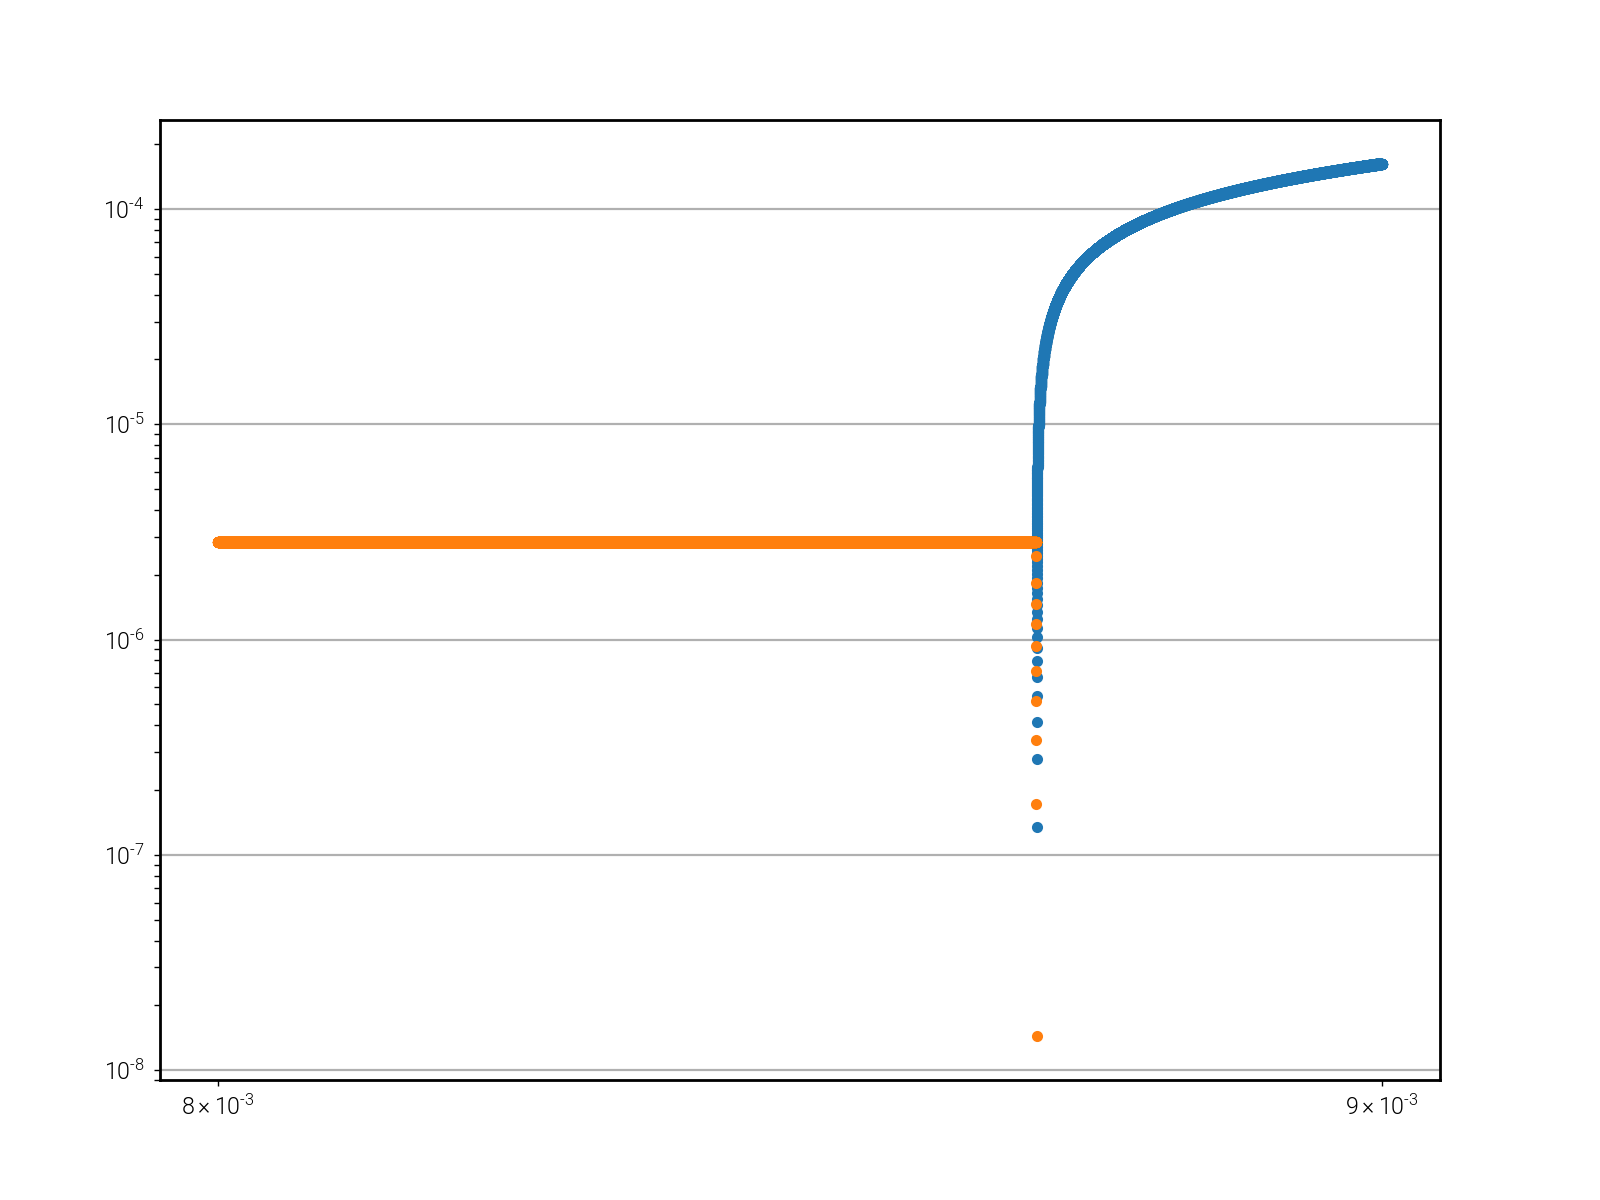

In [123]:
A = A_range
smax = np.array(growth)

plt.figure()
plt.figure()
plt.plot(A[smax > 0], smax[smax > 0], '.')
plt.plot(A[smax < 0], -smax[smax < 0], '.')
plt.xscale('log')
plt.yscale('log')
plt.grid()
#plt.plot(A_range, growth, '.-k')
#plt.xlabel('Amplitude')
#plt.ylabel('Growth rate')

<IPython.core.display.Javascript object>


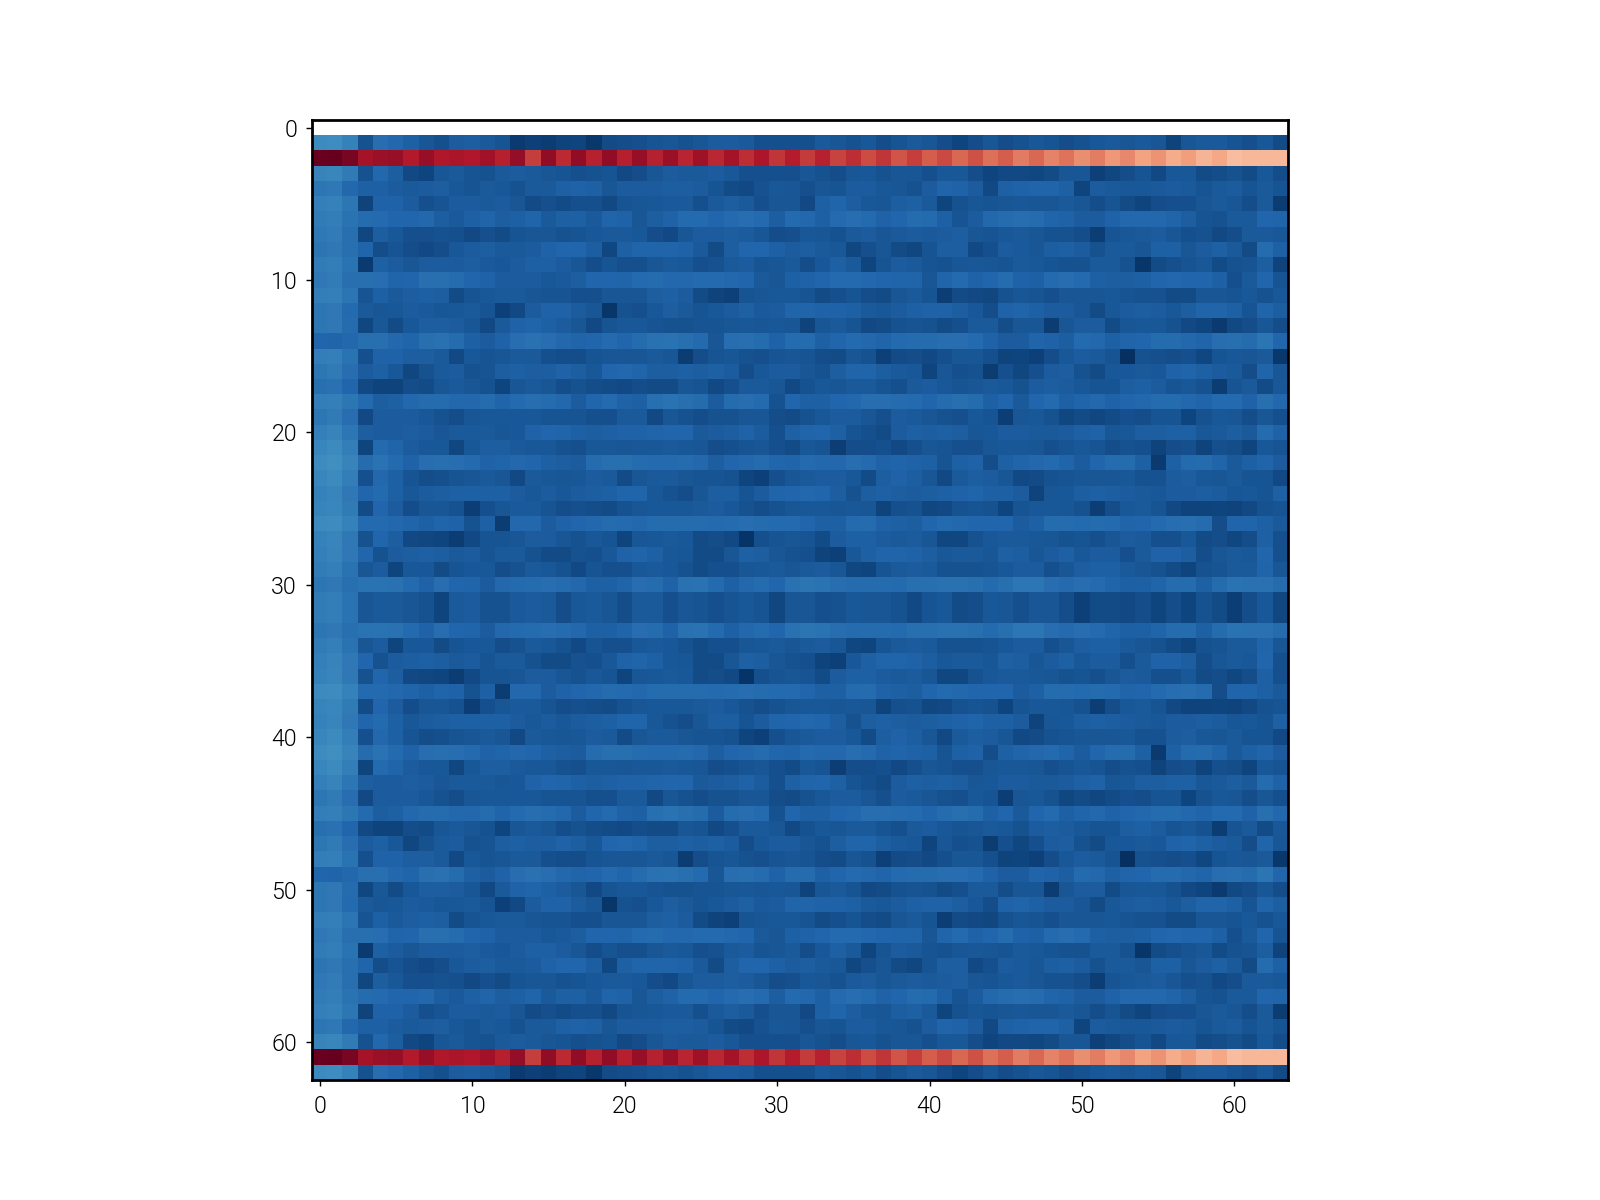

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


In [28]:
plt.figure()
plt.imshow(np.log10(np.abs(solver.state['p1']['c'])))

In [323]:
krel_b, krel_c

(1, 1)

In [27]:
solver_bvp.state.data

array([[ 0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j, ...,
         0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j],
       [-2.74875079e-16+5.21320386e-17j,  2.11737227e-18-3.98806048e-19j,
         1.09655938e-19-1.68711202e-20j, ...,
        -1.08891258e-22+2.27834387e-21j,  1.35011105e-17-1.02794735e-17j,
         1.47161148e-19-1.93077882e-19j],
       [ 2.32132675e+00-3.82630916e-03j, -1.78554579e-02-1.41137860e-04j,
        -5.23319326e-05+1.09372640e-01j, ...,
         5.52590401e-08-6.91316875e-09j, -6.51814102e-05-2.47870458e-04j,
        -2.32238623e-06+6.07882518e-08j],
       ...,
       [ 1.30509792e-16+4.89215079e-17j, -1.00442476e-18-3.76563260e-19j,
        -7.93123517e-20-2.76397516e-21j, ...,
         6.37252307e-20+2.06693107e-20j, -1.32547889e-16+1.20990249e-16j,
        -8.25641513e-18-1.86154692e-18j],
       [ 2.32132675e+00+3.82630916e-03j, -1.